# 強化学習の学習
強化学習を自習するためのノートブック

## 環境の定義
まず，強化学習エージェントを動かすための環境を定義する．

ここでは，強化学習のテキスト等でよく扱われる三目並べ（tic-tac-toe）と多腕バンディット（multi-armed bandit）問題を環境として用いる．

### 必要なパッケージのインポート

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### env1: tic-tac-toe

In [56]:
import gym_tic_tac_toe
env1 = gym.make("tic_tac_toe-v0")

observation = env1.reset()
action = env1.action_space.sample()

env1.action_space
env1.step([1,1])
env1.step([-1,2])
env1.step([1,4])
env1.step([-1,8])
env1.step([1,7])

[2017-09-14 16:21:35,424] Making new env: tic_tac_toe-v0


({'board': [0, 1, -1, 0, 1, 0, 0, 1, -1], 'on_move': -1}, 1, True, {})

### env2: multi-armed bandit

In [130]:
import gym_bandits
env2 = gym.make("BanditTenArmedRandomFixed-v0")

observation = env2.reset()
action = env2.action_space.sample()

env2.step(8)

[2017-09-14 17:50:08,103] Making new env: BanditTenArmedRandomFixed-v0
/Users/eichi/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full(10, 1) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


(0, 0, True, {})

### env3: CartPole

In [58]:
env3 = gym.make("CartPole-v0")

observation = env3.reset()
action = env3.action_space.sample()

env3.step(action)

[2017-09-14 16:33:14,154] Making new env: CartPole-v0


(array([-0.0229216 ,  0.22326582,  0.02004362, -0.32368031]), 1.0, False, {})

## greedyアルゴリズムの実装

ここでは，multi-armed banditにて実験を行う．

> まだ$ n $回選んだことがない腕がある場合，その腕を選ぶ

> それ以外の場合，すべての腕に対して，これまでの報酬の平均を計算する


> \begin{equation*}
 \mu_i = \frac{これまで腕 i から得られた報酬の和}{これまで腕 i をプレイした回数}
 \end{equation*}

> $\mu_i$が最大の腕を選ぶ

In [151]:
class GreedyAgent:
    def __init__(self, n_arm, n_step):
        self.n_arm = n_arm
        self.n_step = n_step
        self.reward = 0
        self.average_reward = []
        self.n_played = 0
        self.reward_arm_list = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    
    def run(self):
        env2.reset()
        #  各腕を n 回ずつ選択し，報酬を記録
        for i in range(self.n_arm):
            for arm in range(10):
                observation, reward, done, info = env2.step(arm)
                self.reward_arm_list[arm] += reward
                self.reward += reward
                self.n_played += 1
                self.average_reward.append(self.reward / self.n_played)
        # μの計算
        for arm in range(10):
            self.reward_arm_list[arm] /= self.n_arm
        mu_list = self.reward_arm_list
        
        # μに基づいた選択
        for i in range(self.n_step - (self.n_arm * 10)):
            action = mu_list.index(max(mu_list))
            observation, reward, done, info = env2.step(action)
            self.reward += reward
            self.n_played += 1
            self.average_reward.append(self.reward / self.n_played)
            
        return self.average_reward

In [194]:
agent = GreedyAgent(5, 10000)
reward_list = agent.run()

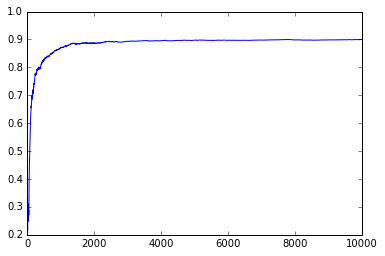

In [195]:
plt.plot(reward_list)

#### 